In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [4]:
#Read the Dataset 1990 to 1999

df1= pd.read_csv("C:/Users/MY COMPUTER/Desktop/Singapore Realestate Price Preditcion/ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [5]:
#Read the Dataset 2000 to 2012

df2= pd.read_csv("C:/Users/MY COMPUTER/Desktop/Singapore Realestate Price Preditcion/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [6]:
#Read the Dataset 2012 to 2014

df3= pd.read_csv("C:/Users/MY COMPUTER/Desktop/Singapore Realestate Price Preditcion/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [7]:
#Read the Dataset 2015 to 2016

df4= pd.read_csv("C:/Users/MY COMPUTER/Desktop/Singapore Realestate Price Preditcion/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [8]:
#Read the Dataset 2017 to till date

df5= pd.read_csv("C:/Users/MY COMPUTER/Desktop/Singapore Realestate Price Preditcion/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

## Pre_Processing the Data

In [9]:
#before handlig missing values
#first correct the Remaining lease date 

In [10]:
df4["remaining_lease"]= df4["remaining_lease"].astype(int)

In [11]:
df4.rename(columns={'remaining_lease': 'remaining_lease_year'})

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_year,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [12]:
slice_values= []
for i in df5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [13]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [14]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [15]:
#droping the "remaining_lease" column
df5.drop(columns=["remaining_lease"],inplace= True)

In [16]:

df5= pd.concat([df5,df_data],axis=1)

## Merging the Dataset

In [17]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df.reset_index(drop=True,inplace=True)
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,NaN,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN


## clean the data set

In [18]:
#Missing value --> Yes,it is corrected
#Duplicates -->yes, it is corrected
#inCorrect Formate --> yes,it is corrected
#Encoding --> yes
#outlier --> yes,it is corrected
#unstructured Data -->

In [19]:
df.shape

(927465, 13)

In [20]:
df.isna().sum()

month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
remaining_lease          890312
remaining_lease_year     746203
remaining_lease_month    746203
dtype: int64

In [21]:
df.drop(columns=["remaining_lease"],inplace=True)

In [22]:
#handling the missing value
df["remaining_lease_year"].fillna(0,inplace=True)
df["remaining_lease_month"].fillna(0,inplace=True)

In [23]:
df.isna().sum()

month                    0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
remaining_lease_year     0
remaining_lease_month    0
dtype: int64

In [24]:
df.shape

(927465, 12)

In [25]:
df=df.drop_duplicates()

In [26]:
df.shape

(925566, 12)

### changing the columns 

#### Correct the Data types

In [27]:
df.dtypes

month                     object
town                      object
flat_type                 object
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
resale_price             float64
remaining_lease_year     float64
remaining_lease_month    float64
dtype: object

In [28]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

In [29]:
#droping the "street_name" and "block"
df= df.drop(columns=["block","street_name"])

In [30]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,address
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,0.0,0.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,0.0,0.0,309 ANG MO KIO AVE 1


In [31]:
# for month
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

In [32]:
#spliting the month column to "Year", "month", "day"
df["year"]= df["month"].dt.year
df["month"]= df["month"].dt.month

In [33]:

df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,0.0,0.0,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,0.0,0.0,309 ANG MO KIO AVE 1,1990


In [34]:

df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [36]:

df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [37]:
df["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [38]:
df.address.nunique()

9836

In [39]:
#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])
df["flat_type"]= OrdinalEncoder().fit_transform(df[["flat_type"]])
df["address"]= LabelEncoder().fit_transform(df["address"])

In [40]:
df["town"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [41]:
df["flat_type"].unique()

array([0., 2., 3., 4., 1., 5., 6., 7.])

In [42]:

df["flat_model"].unique()

array([ 7., 20., 12., 27., 26., 13.,  3., 11., 30.,  0.,  8., 14., 22.,
        9., 21., 16., 29.,  5., 28., 17., 15., 19.,  4., 23., 31., 10.,
       25.,  1., 18.,  6., 32., 33., 24.,  2.])

In [43]:
df[["storey_start", "storey_end"]]= df["storey_range"].str.split(" TO ",expand=True)
#droping the "storey_range" column
df.drop(columns=["storey_range"],inplace= True)


In [44]:
df["storey_start"]= df["storey_start"].astype(int)
df["storey_end"]= df["storey_end"].astype(int)

In [45]:
# set the columns
df= df[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [46]:
# after correction we converted the dataframe
df.to_csv("ResaleFlatPrices.csv", index= False)

## Checking Skewness in the Data

In [47]:
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)
  
  plt.subplot(1,2,2)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


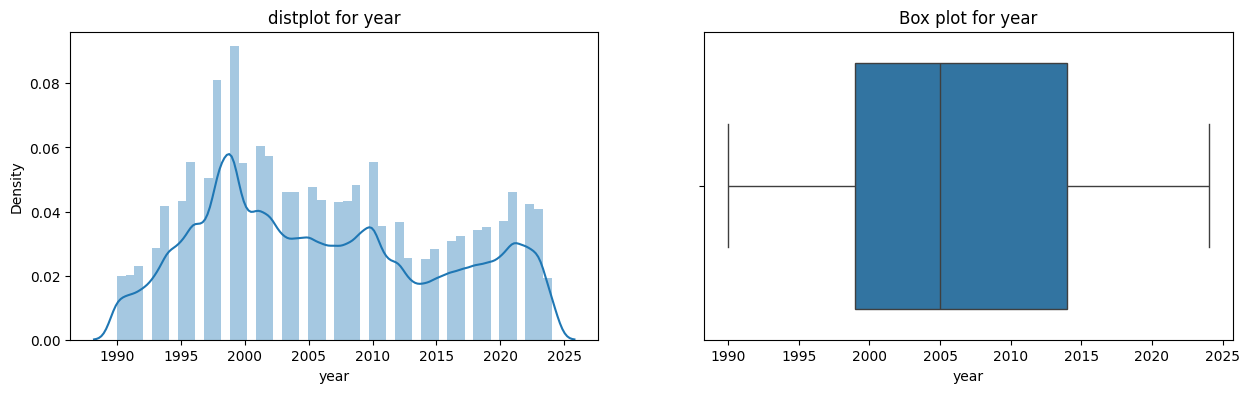

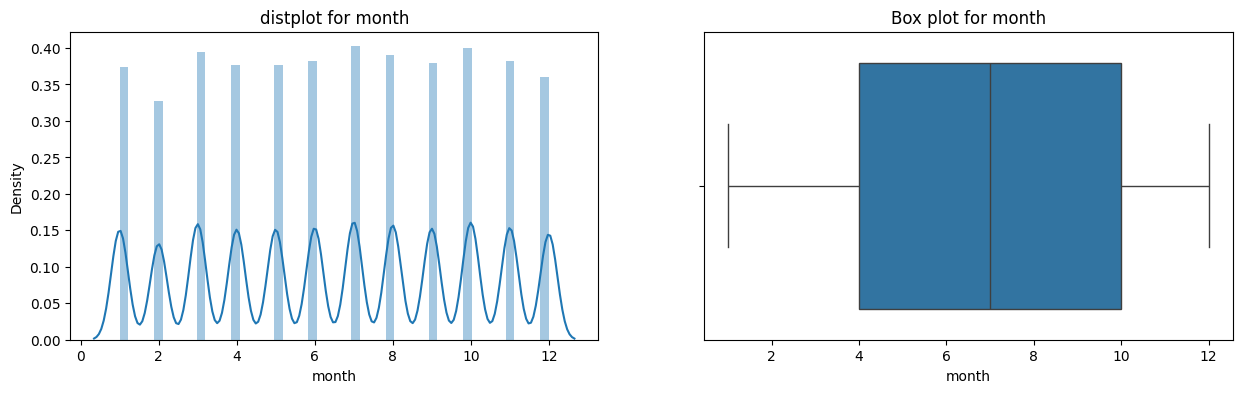

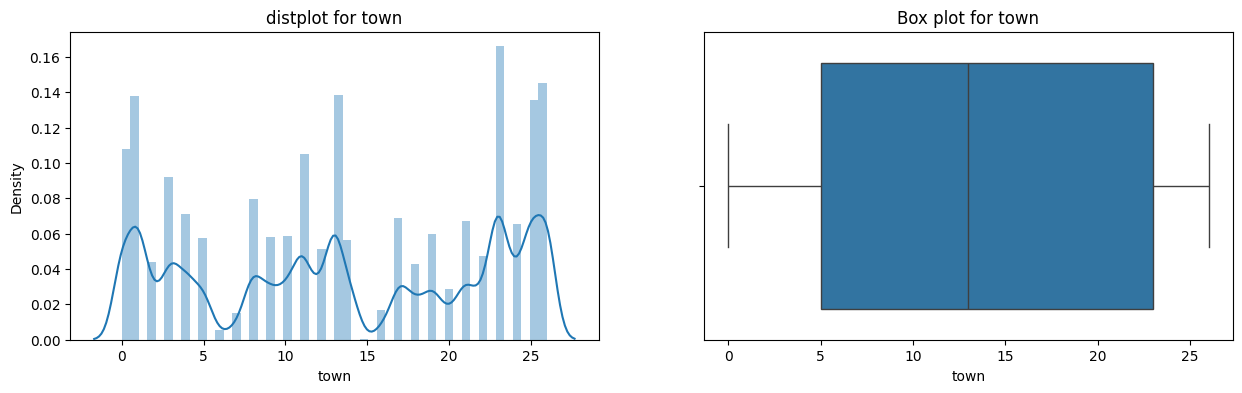

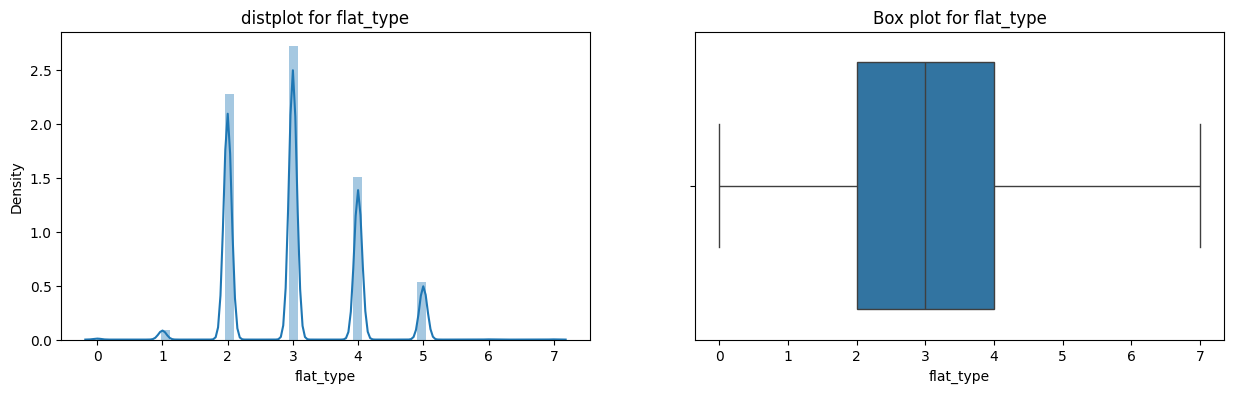

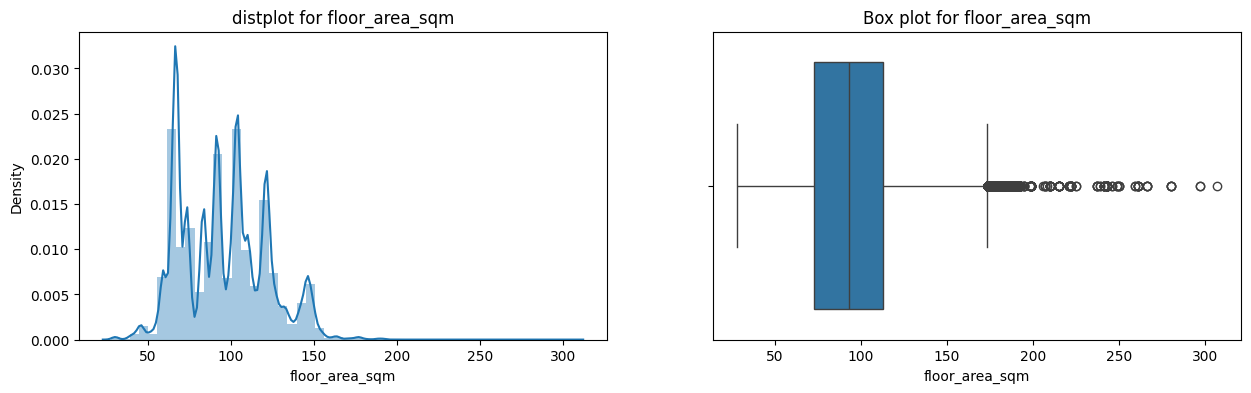

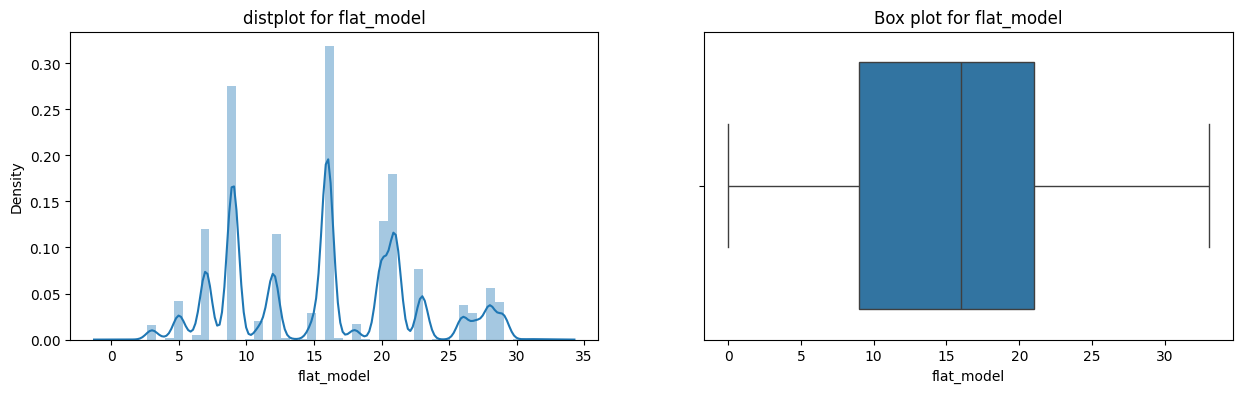

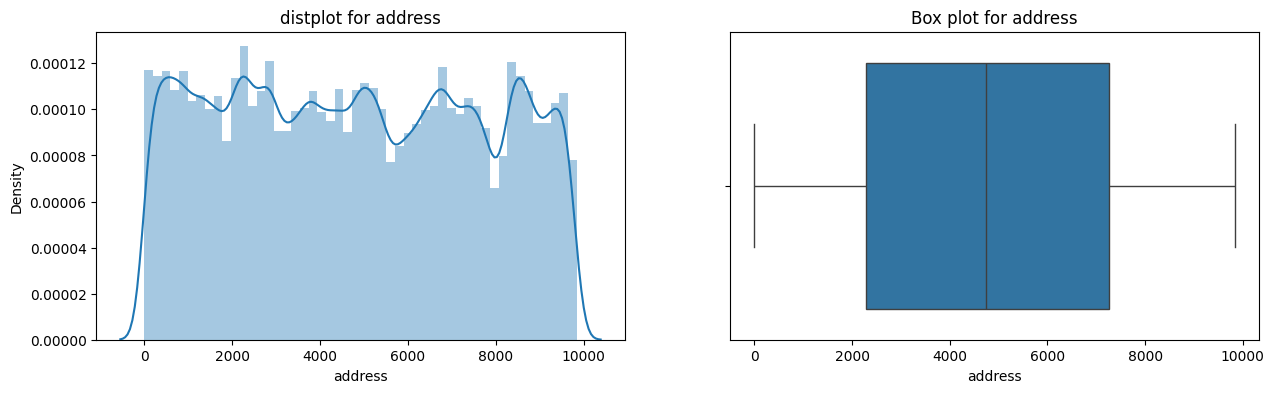

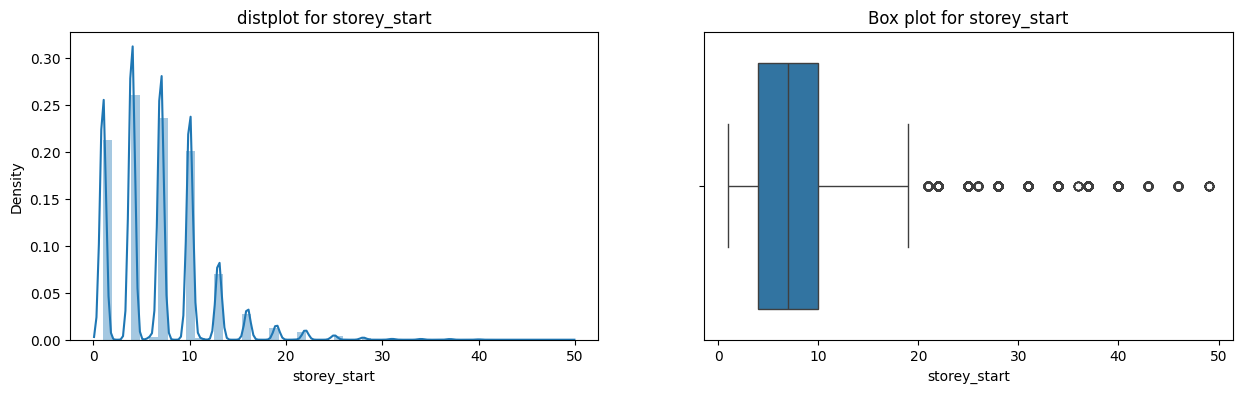

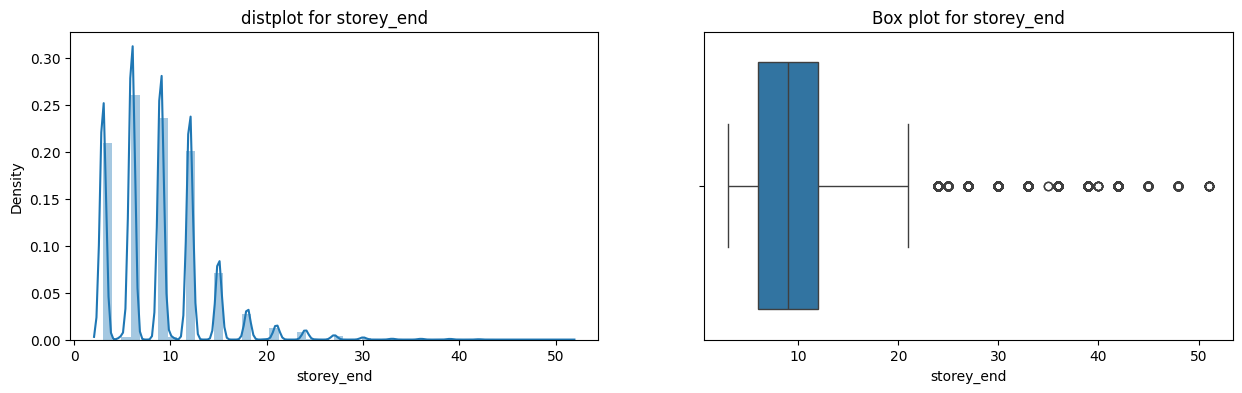

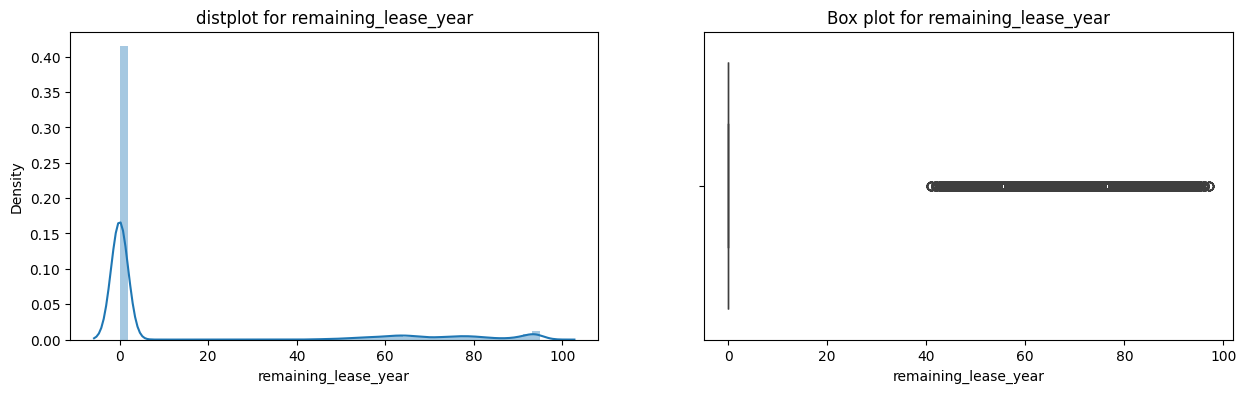

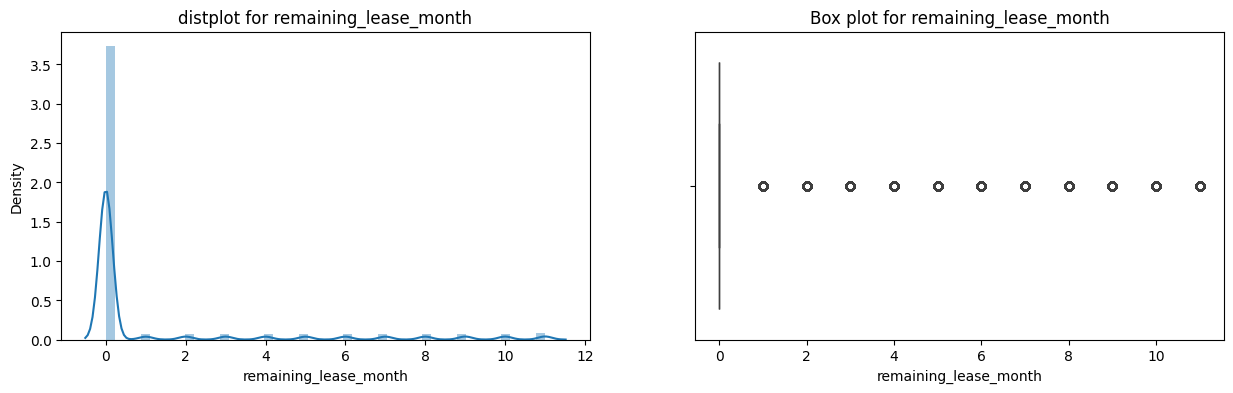

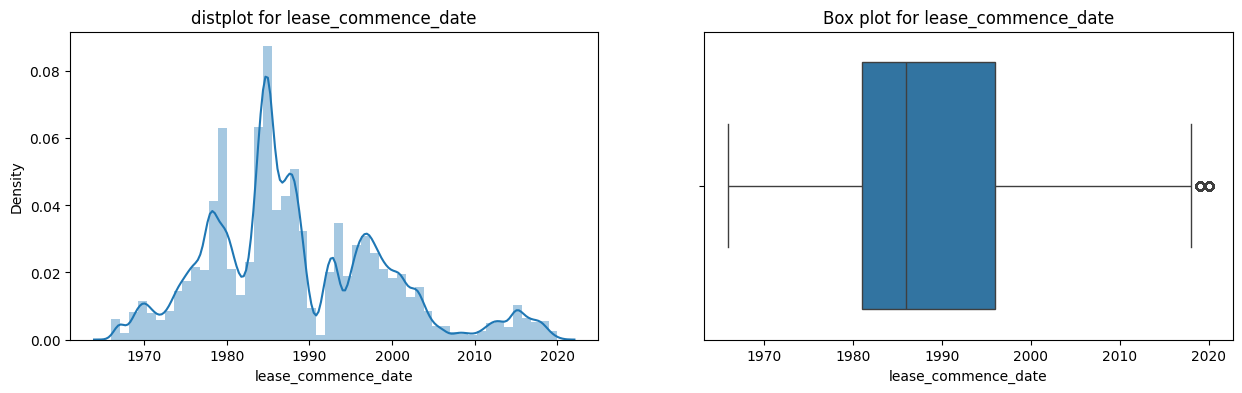

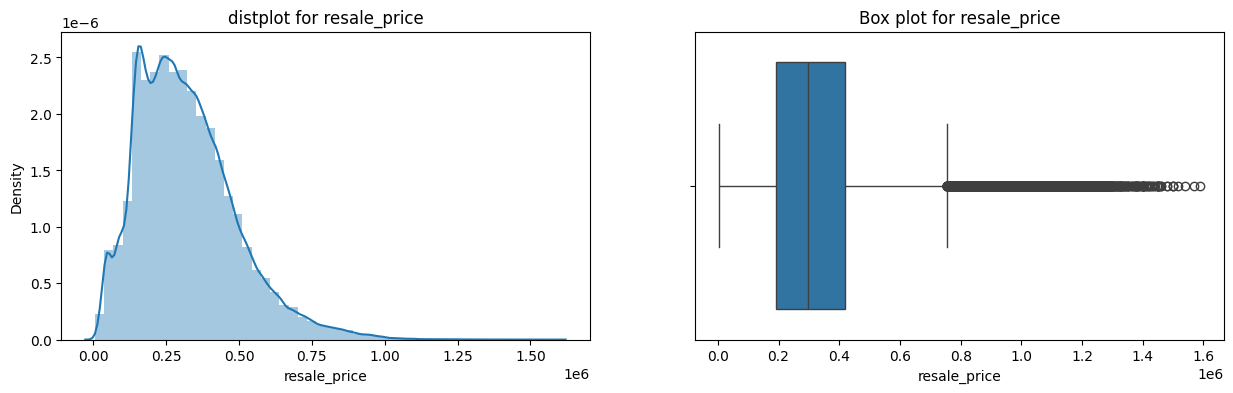

In [48]:
for i in df.columns:
    plot(df,i)

In [49]:
# Based on the plot prediction the Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price
# so we Tranform the Data

In [50]:
df["storey_start"]= np.log(df["storey_start"])
df["storey_end"]= np.log(df["storey_end"])
df["resale_price"]= np.log(df["resale_price"])

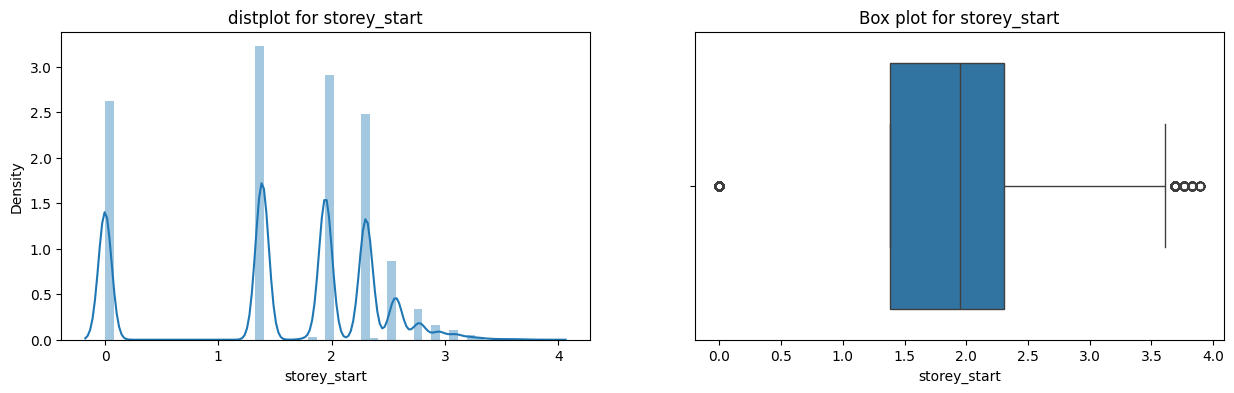

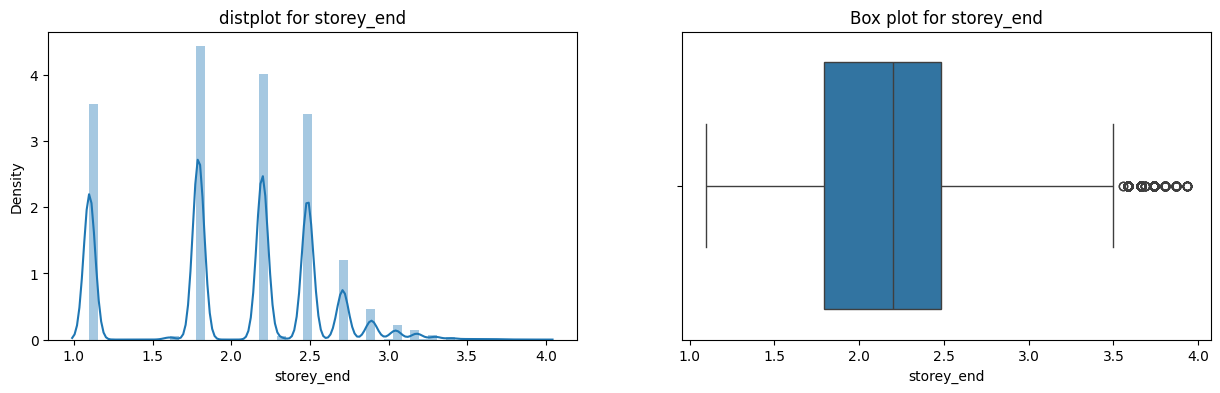

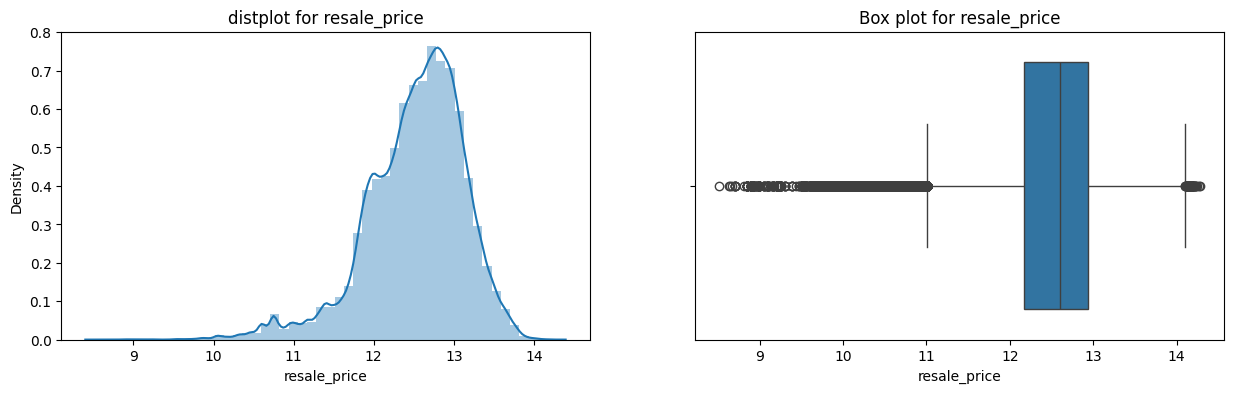

In [51]:
# after Tranformation Skewness Checking
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df,i)

## Outlier Correction

In [52]:
# cliping the outlier for this columns
outlier_columns=['year', 'month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'address', 'storey_start', 'storey_end',
        'lease_commence_date', 'resale_price']

In [53]:
for col in outlier_columns:
    iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
    upper_threshold=df[col].quantile(0.75)+(1.5*iqr)
    lower_threshold=df[col].quantile(0.25)-(1.5*iqr)
    df[col]=df[col].clip(lower_threshold,upper_threshold)

## Exploratory Data Analysis(EDA)

,year,resale_price
year,1.000000,0.909205
resale_price,0.909205,1.000000


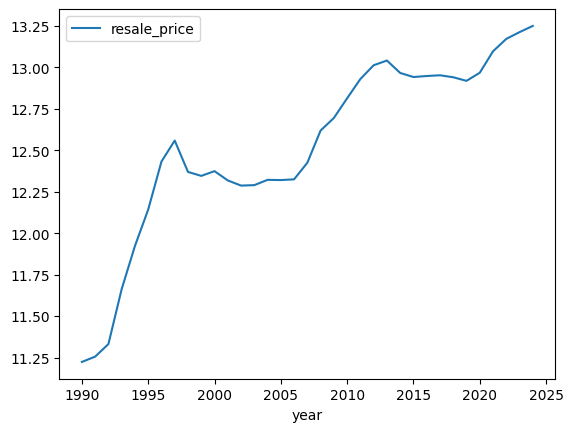

In [54]:
# checking for correlation
df.groupby("year")["resale_price"].mean().reset_index().plot.line(x="year",y="resale_price")
df.groupby("year")["resale_price"].mean().reset_index().corr()

,month,resale_price
month,1.000000,0.333409
resale_price,0.333409,1.000000


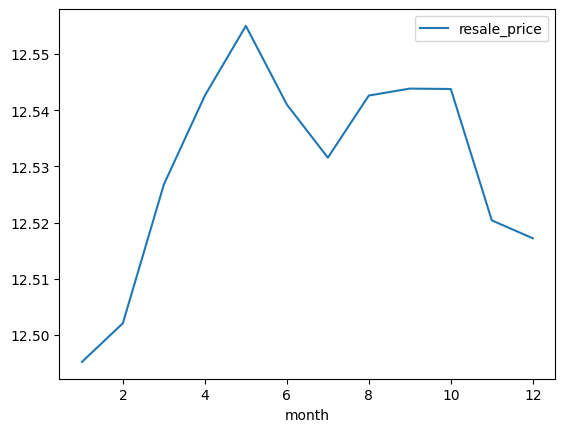

In [55]:
df.groupby("month")["resale_price"].mean().reset_index().plot.line(x="month",y="resale_price")
df.groupby("month")["resale_price"].mean().reset_index().corr()

,town,resale_price
town,1.000000,0.067887
resale_price,0.067887,1.000000


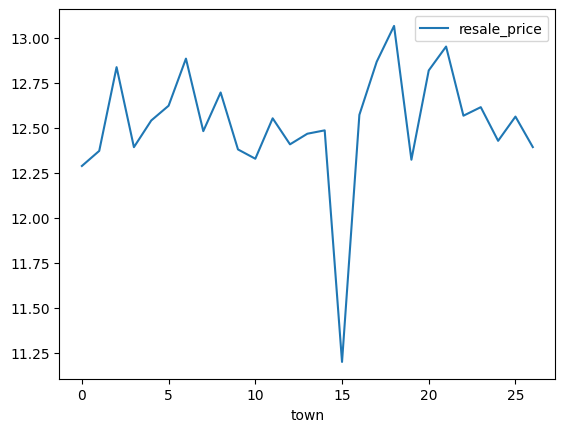

In [56]:
df.groupby("town")["resale_price"].mean().reset_index().plot.line(x="town",y="resale_price")
df.groupby("town")["resale_price"].mean().reset_index().corr()

,flat_type,resale_price
flat_type,1.000000,0.950662
resale_price,0.950662,1.000000


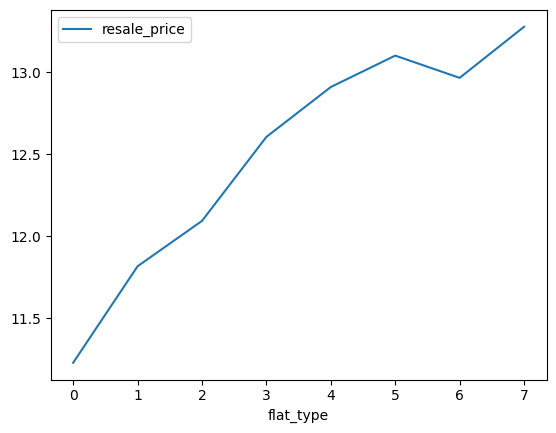

In [57]:
df.groupby("flat_type")["resale_price"].mean().reset_index().plot.line(x="flat_type",y="resale_price")
df.groupby("flat_type")["resale_price"].mean().reset_index().corr()

,floor_area_sqm,resale_price
floor_area_sqm,1.000000,0.865354
resale_price,0.865354,1.000000


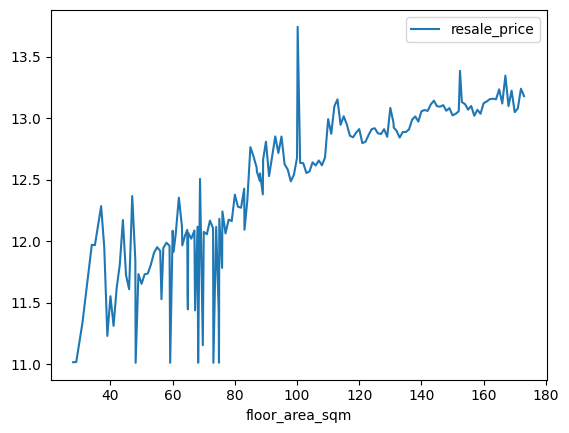

In [58]:
df.groupby("floor_area_sqm")["resale_price"].mean().reset_index().plot.line(x="floor_area_sqm",y="resale_price")
df.groupby("floor_area_sqm")["resale_price"].mean().reset_index().corr()

,flat_model,resale_price
flat_model,1.000000,0.153775
resale_price,0.153775,1.000000


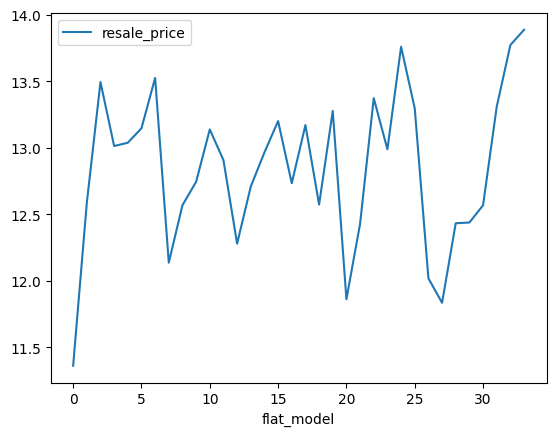

In [59]:
df.groupby("flat_model")["resale_price"].mean().reset_index().plot.line(x="flat_model",y="resale_price")
df.groupby("flat_model")["resale_price"].mean().reset_index().corr()

,address,resale_price
address,1.000000,0.061205
resale_price,0.061205,1.000000


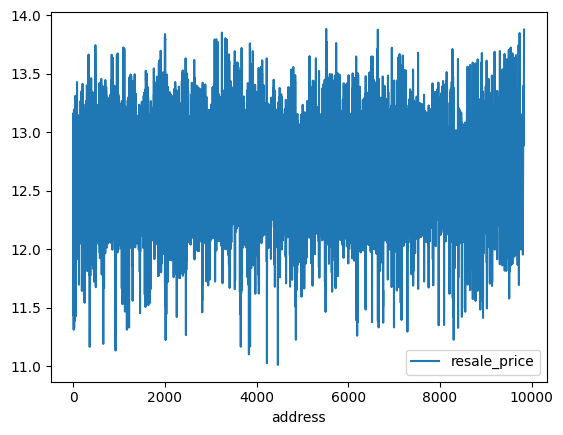

In [60]:
df.groupby("address")["resale_price"].mean().reset_index().plot.line(x="address",y="resale_price")
df.groupby("address")["resale_price"].mean().reset_index().corr()

,storey_start,resale_price
storey_start,1.000000,0.827263
resale_price,0.827263,1.000000


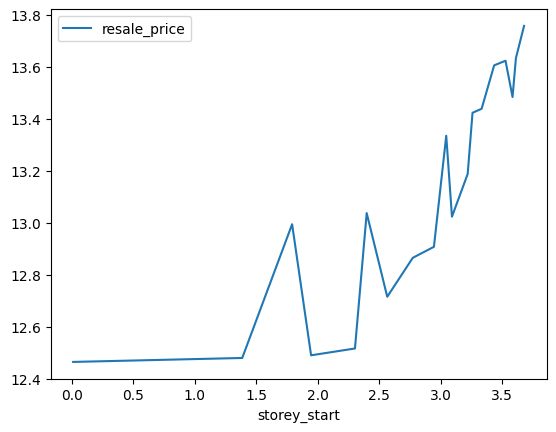

In [61]:
df.groupby("storey_start")["resale_price"].mean().reset_index().plot.line(x="storey_start",y="resale_price")
df.groupby("storey_start")["resale_price"].mean().reset_index().corr()

,storey_end,resale_price
storey_end,1.000000,0.785828
resale_price,0.785828,1.000000


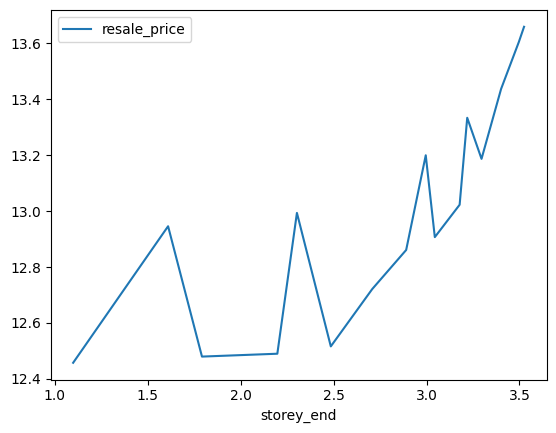

In [62]:
df.groupby("storey_end")["resale_price"].mean().reset_index().plot.line(x="storey_end",y="resale_price")
df.groupby("storey_end")["resale_price"].mean().reset_index().corr()

,remaining_lease_year,resale_price
remaining_lease_year,1.00000,0.91172
resale_price,0.91172,1.00000


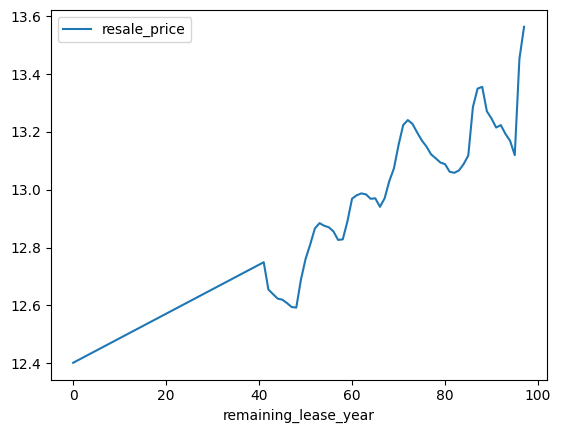

In [63]:
df.groupby("remaining_lease_year")["resale_price"].mean().reset_index().plot.line(x="remaining_lease_year",y="resale_price")
df.groupby("remaining_lease_year")["resale_price"].mean().reset_index().corr()

,remaining_lease_month,resale_price
remaining_lease_month,1.000000,0.493788
resale_price,0.493788,1.000000


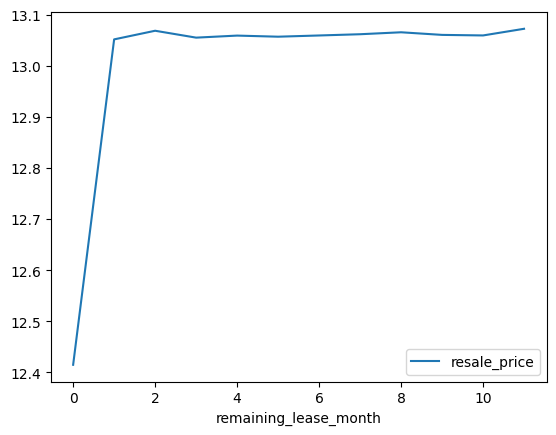

In [64]:
df.groupby("remaining_lease_month")["resale_price"].mean().reset_index().plot.line(x="remaining_lease_month",y="resale_price")
df.groupby("remaining_lease_month")["resale_price"].mean().reset_index().corr()

,lease_commence_date,resale_price
lease_commence_date,1.000000,0.964165
resale_price,0.964165,1.000000


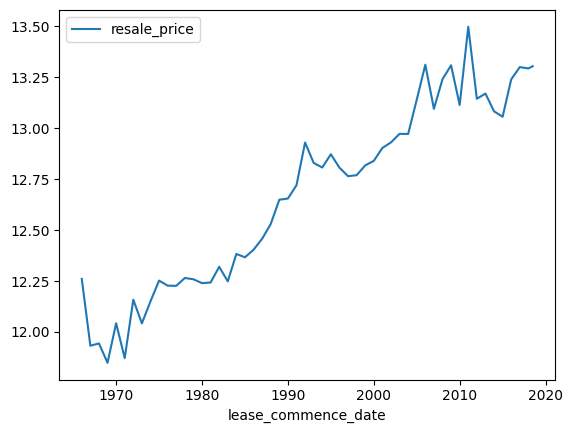

In [65]:
df.groupby("lease_commence_date")["resale_price"].mean().reset_index().plot.line(x="lease_commence_date",y="resale_price")
df.groupby("lease_commence_date")["resale_price"].mean().reset_index().corr()

In [66]:
df.drop(columns="address")

,year,month,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,1990,1,0,0.0,31.0,7.0,2.302585,2.484907,0.0,0.0,1977.0,11.011259
1,1990,1,0,0.0,31.0,7.0,1.386294,1.791759,0.0,0.0,1977.0,11.011259
2,1990,1,0,0.0,31.0,7.0,2.302585,2.484907,0.0,0.0,1977.0,11.011259
3,1990,1,0,0.0,31.0,7.0,1.945910,2.197225,0.0,0.0,1977.0,11.011259
4,1990,1,0,2.0,73.0,20.0,1.386294,1.791759,0.0,0.0,1976.0,11.011259
...,...,...,...,...,...,...,...,...,...,...,...,...
927460,2024,6,26,4.0,112.0,9.0,2.302585,2.484907,92.0,8.0,2018.0,13.511699
927461,2024,6,26,4.0,122.0,9.0,1.945910,2.197225,62.0,10.0,1988.0,13.429848
927462,2024,6,26,5.0,146.0,15.0,2.302585,2.484907,61.0,0.0,1986.0,13.579788
927463,2024,6,26,5.0,146.0,15.0,2.302585,2.484907,62.0,8.0,1988.0,13.815511


## spliting the data

In [67]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["resale_price"])
y=df["resale_price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9)


## Scaling

In [68]:
# scaling is not mandatory

## Model selection(Regression model)

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}")

Test data accuracy : 0.7932511976334606


### Decision Tree Regression

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

for depth in [20,21,22,23,24,25]:
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train,y_train)
  train_score = model.score(X_train,y_train)
  cross_val=np.mean(cross_val_score(model,X_train,y_train,cv=10))
  print(f"Depth-{depth},Train_score-{train_score},Cross_val-{cross_val}")

Depth-20,Train_score-0.9886044441798744,Cross_val-0.9725873767902481
Depth-21,Train_score-0.9909112555341757,Cross_val-0.9726767289348792
Depth-22,Train_score-0.992814006492957,Cross_val-0.9726018871850718
Depth-23,Train_score-0.9944181241712933,Cross_val-0.9724159810000399
Depth-24,Train_score-0.9957097387571967,Cross_val-0.9720175901687387
Depth-25,Train_score-0.9967381036638807,Cross_val-0.9715696538451674


In [71]:
from sklearn.metrics import r2_score
model = DecisionTreeRegressor(max_depth = 21)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.9734880639545139, r2-Score: 0.9732625296869196


### RandomForest Regression Algorithm

In [73]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 21, max_features = "sqrt")

for n in [10, 20, 50]:
  model = RandomForestRegressor(n_estimators = n, max_depth = 21, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9744635861768541
N: 20, Cross-Val Score: 0.9759300306593144
N: 50, Cross-Val Score: 0.9767576011555608


In [74]:
model = RandomForestRegressor(n_estimators = 50, max_depth = 21, max_features = "sqrt")
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.9774148944384938, r2-Score: 0.9762278110645413


### XG booster Regression Algorithm

In [75]:
from xgboost import XGBRegressor

for lamb in [0.1, 0.2, 0.5, 1]:
  model = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.9743589350003179
Lambda: 0.2, Cross-Val Score: 0.9801664115616143
Lambda: 0.5, Cross-Val Score: 0.9829894096750145
Lambda: 1, Cross-Val Score: 0.9815500542699894


In [ ]:

model = XGBRegressor(learning_rate = 0.5)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, r2-Score: {r2_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.9829142572205972, r2-Score: 0.98263557057159


## Bestmodel is XG booster Regression

In [78]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x=df.drop(columns=["resale_price","address"])
y=df["resale_price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

model_r = XGBRegressor(learning_rate=0.5).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9816473897259137, 0.9810062205056516)

In [79]:
import pickle
     

with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)
     

with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)